# Tractement i comparativa de dades referent a la relació entre el preu mig del lloguer i la contaminació acustica dels diferents districtes de Barcelona al 2017

In [1]:
# Es carreguen els dos df des del navegador d'arxius
library(readr)
lloguer <- read_csv("2017_lloguer_preu_trim.csv")
soroll <- read_csv("2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv")

Rows: 584 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Nom_Districte, Nom_Barri, Lloguer_mitja
dbl (5): Any, Trimestre, Codi_Districte, Codi_Barri, Preu


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 18980 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Nom_Districte, Nom_Barri, Concepte, Rang_soroll, Valor
dbl (2): Codi_Districte, Codi_Barri


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [2]:
# Eliminem les dades buides (NA's) dels dataframe.
lloguer<-na.omit(lloguer)
soroll<-na.omit(soroll)
#La variable "Preu" del df "lloguer" est'a expressada en dos unitats: Euros/m2 mes i Euros/mes. Considero que Euros/m2 mes és més significativa per que no està afectada pels m2 del pis.
#Eliminem les dades expressades en Euros/mes de la columna "Preu" del df "lloguer".
lloguer<-subset(lloguer, lloguer$Lloguer_mitja=='Lloguer mitjà per superfície (Euros/m2 mes)')

In [3]:
#La variable "Rang_soroll" del df "soroll" està expressada en una variable de tipus categórica.
#Es procedeix a crear una nova variable anomenada "Rang_Codi" per donar valor numèric a la variable "Rang_soroll" i es dona valor segons el rang de soroll.
soroll$Codi_Rang<-0
for (i in 1:nrow(soroll)) {
          if (soroll[i, 6] == '<40 dB') {
                  soroll[i, 8] = 1
              } else if (soroll[i, 6] == '40-45 dB') {
                      soroll[i, 8] = 2
                  } else if (soroll[i, 6] == '45-50 dB') {
                          soroll[i, 8] = 3
                      } else if (soroll[i, 6] == '50-55 dB') {
                              soroll[i, 8] = 4
                          } else if (soroll[i, 6] == '55-60 dB') {
                                  soroll[i, 8] = 5
                              } else if (soroll[i, 6] == '60-65 dB') {
                                      soroll[i, 8] = 6
                                  } else if (soroll[i, 6] == '65-70 dB') {
                                          soroll[i, 8] = 7
                                      } else if (soroll[i, 6] == '70-75 dB') {
                                              soroll[i, 8] = 8
                                          } else if (soroll[i, 6] == '75-80 dB') {
                                                  soroll[i, 8] = 9
                                              } else if (soroll[i, 6] == '>=80 dB') {
                                                      soroll[i, 8] = 10
                                                  }
}

In [4]:
#Normalitzem el preu i el rang de soroll
soroll$Codi_Rang_norm<-round((soroll$Codi_Rang-min(soroll$Codi_Rang))/(max(soroll$Codi_Rang)-min(soroll$Codi_Rang)), 3)
lloguer$Preu_norm<-round((lloguer$Preu-min(lloguer$Preu))/(max(lloguer$Preu)-min(lloguer$Preu)), 3)

In [5]:
#Unifiquem els dos df en un de sol "soroll.lloguer" mitjançant la variable "Codi_Barri", present a tots dos df.
soroll.lloguer <- merge(lloguer, soroll, by = "Codi_Barri", all.x = TRUE)
#Es procedeix a eliminar les variables repetides.
soroll.lloguer <- subset(soroll.lloguer, select = -c(Codi_Districte.x, Nom_Districte.x, Nom_Barri.x))
#Ara podem visualitzar les dades de Preu i rang de soroll en el mateix df i relacionar-los per barri o districte

In [6]:
#Les dades seran tractades en relació als districtes de Barcelona, ja que son 10 districtes i farà els gràfic i les taules més visuals que si ho fem amb barris, que son 44
#Es crea una nova variable al df "soroll.lloguer" anomenada "Interval" per tal d'agrupar els preus del lloguer en 10 intervals per poder tractar les dades amb els districtes i els rangs de soroll
intervals <- c(0,4.4,6.2,8, 9.8,11.6,13.4, 15.2, 17, 18.8, 20.65 )
soroll.lloguer$Interval <- cut(soroll.lloguer$Preu, breaks = intervals, labels = c("0-4.4", "4.4-6.2", "6.2-8","8-9.8","9.8-11.6","11.6-13.4","13.4-15.2", "15.2-17", "17-18.8", "18.8-20.65"))
lloguer$Interval <- cut(lloguer$Preu, breaks = intervals, labels = c("0-4.4", "4.4-6.2", "6.2-8","8-9.8","9.8-11.6","11.6-13.4","13.4-15.2", "15.2-17", "17-18.8", "18.8-20.65"))

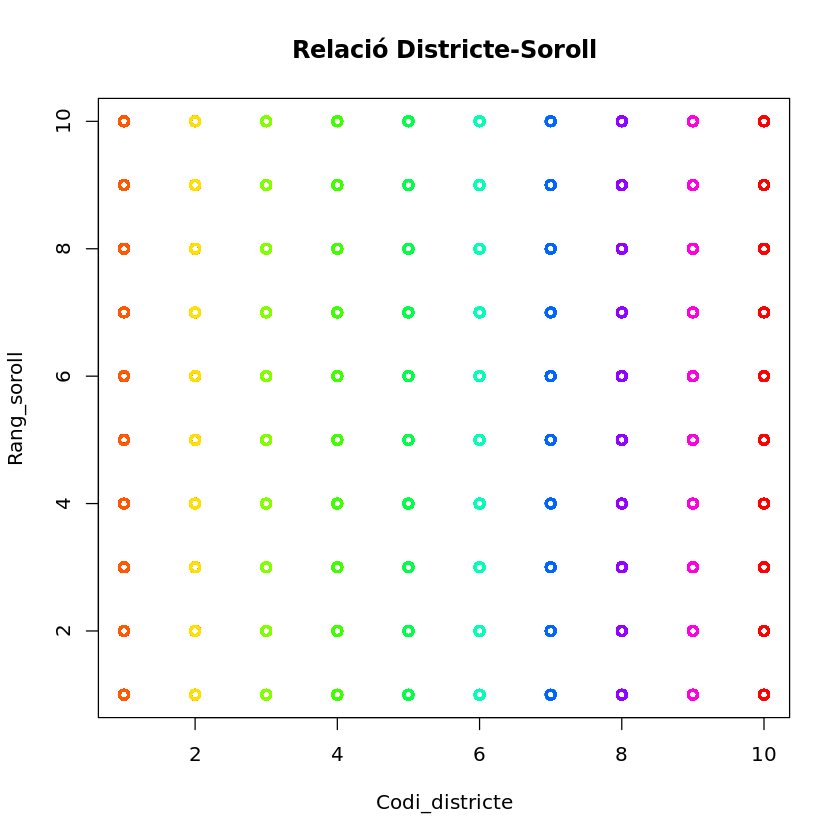

In [7]:
#Es genera un plot que relaciona la distribució de la contaminació acústica entre els diferents districtes de Barcelona
plot(soroll.lloguer$Codi_Districte.y, soroll.lloguer$Codi_Rang, col = rainbow(length(soroll.lloguer$Codi_Districte)), lwd = 2, xlab = "Codi_districte", ylab = "Rang_soroll", main = "Relació Districte-Soroll")

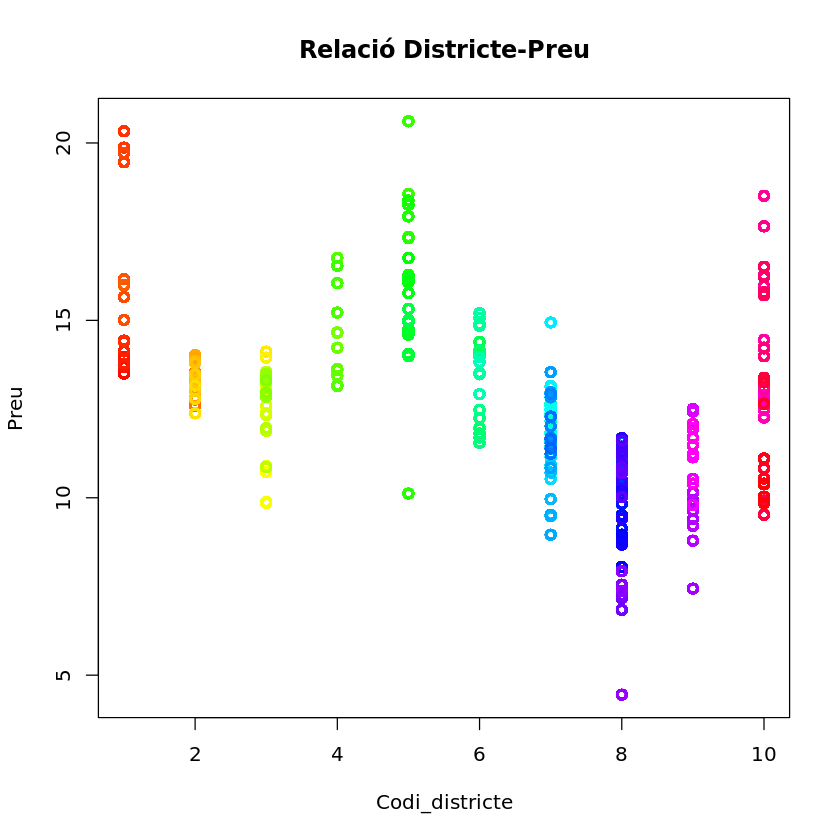

In [8]:
#Es genera un gràfic per relacionar el preu del lloguer amb el districte de Barcelona on es troba la vivenda
plot(soroll.lloguer$Codi_Districte.y, soroll.lloguer$Preu,type = "p", col = rainbow(length(soroll.lloguer$Codi_Districte)), lwd = 2, xlab = "Codi_districte", ylab = "Preu", main = "Relació Districte-Preu")

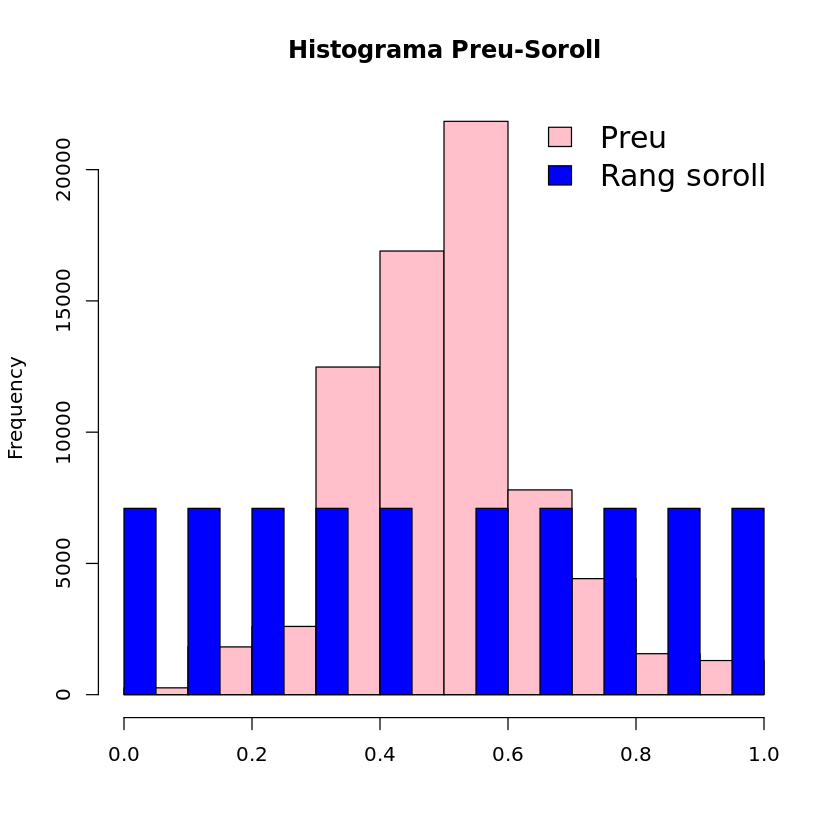

In [9]:
#Es genera un histograma fusionat de les dos variables, per tal de relacionar visualment les freqüències i veure com afecta la contaminació acústica al preu de lloguer.
hist(soroll.lloguer$Preu_norm, breaks=10, col="pink", main="Histograma Preu-Soroll", xlab= NULL)
hist(soroll.lloguer$Codi_Rang_norm, add=TRUE, col="blue")
legend(x="topright", legend=c("Preu", "Rang soroll"),bty="n",cex=1.5, fill=c("pink", "blue"))

In [12]:
#Es generen dos taules entre preu rang de soroll, una de freq absolutes i un altre de freq relativa en tant per cent, per tal de entendre la relació de manera numérica
tab.preuSoroll<-table(soroll.lloguer$Interval, soroll.lloguer$Codi_Rang)
tab.preuSoroll
round(prop.table(tab.preuSoroll, margin = 2), 3)*100


            
                1    2    3    4    5    6    7    8    9   10
  0-4.4         0    0    0    0    0    0    0    0    0    0
  4.4-6.2      26   26   26   26   26   26   26   26   26   26
  6.2-8       208  208  208  208  208  208  208  208  208  208
  8-9.8       442  442  442  442  442  442  442  442  442  442
  9.8-11.6   1690 1690 1690 1690 1690 1690 1690 1690 1690 1690
  11.6-13.4  2262 2262 2262 2262 2262 2262 2262 2262 2262 2262
  13.4-15.2  1612 1612 1612 1612 1612 1612 1612 1612 1612 1612
  15.2-17     520  520  520  520  520  520  520  520  520  520
  17-18.8     208  208  208  208  208  208  208  208  208  208
  18.8-20.65  130  130  130  130  130  130  130  130  130  130

            
                1    2    3    4    5    6    7    8    9   10
  0-4.4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  4.4-6.2     0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4
  6.2-8       2.9  2.9  2.9  2.9  2.9  2.9  2.9  2.9  2.9  2.9
  8-9.8       6.2  6.2  6.2  6.2  6.2  6.2  6.2  6.2  6.2  6.2
  9.8-11.6   23.8 23.8 23.8 23.8 23.8 23.8 23.8 23.8 23.8 23.8
  11.6-13.4  31.9 31.9 31.9 31.9 31.9 31.9 31.9 31.9 31.9 31.9
  13.4-15.2  22.7 22.7 22.7 22.7 22.7 22.7 22.7 22.7 22.7 22.7
  15.2-17     7.3  7.3  7.3  7.3  7.3  7.3  7.3  7.3  7.3  7.3
  17-18.8     2.9  2.9  2.9  2.9  2.9  2.9  2.9  2.9  2.9  2.9
  18.8-20.65  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8  1.8